In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel(r"C:\Users\Chinelo\Desktop\seedbuilders project\ds_salariesxlsx.xlsx")



In [10]:
df.dropna(inplace = True)


In [11]:
df

,Unnamed: 0,work_year,years_of_experience,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,4,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,4,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,4,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,4,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,4,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,2,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,2,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,2,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,2,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [13]:
#correlation between years of work experience and salary

correlation= df['years_of_experience'].corr(df['salary'])
print("correlation between years of work experience and salary:", correlation)

correlation between years of work experience and salary: 0.08757738389451905


In [14]:
# How salary vary across different job titles and experience levels

salary_stats = df.groupby(['job_title', 'experience_level'])['salary'].describe()
print(salary_stats)

                                                count           mean  \
job_title                     experience_level                         
3D Computer Vision Researcher MI                  1.0  400000.000000   
AI Scientist                  EN                  4.0  414750.000000   
                              MI                  2.0  160000.000000   
                              SE                  1.0   55000.000000   
Analytics Engineer            EX                  2.0  155000.000000   
...                                               ...            ...   
Product Data Analyst          MI                  2.0  235000.000000   
Research Scientist            EN                  4.0   80500.000000   
                              MI                  7.0  142142.714286   
                              SE                  5.0   90180.000000   
Staff Data Scientist          SE                  1.0  105000.000000   

                                                          std  

In [15]:
# is there any significant differences in salary between different employment types(eg full-time, part-time, contract)

from scipy.stats import f_oneway


# Assuming 'employment_type' and 'salary' are columns in your dataset
# Extract salaries for each employment type
full_time_salaries = df[df['employment_type'] == 'full-time']['salary']
part_time_salaries = df[df['employment_type'] == 'part-time']['salary']
contract_salaries = df[df['employment_type'] == 'contract']['salary']

# Perform ANOVA test
f_statistic, p_value = f_oneway(full_time_salaries, part_time_salaries, contract_salaries)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There are significant differences in salary between different employment types.")
else:
    print("There are no significant differences in salary between different employment types.")

F-statistic: nan
P-value: nan
There are no significant differences in salary between different employment types.


C:\Users\Chinelo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


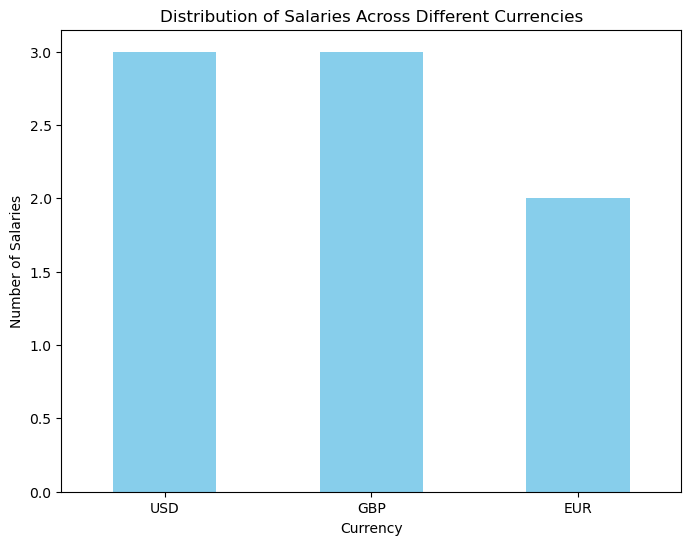

In [16]:
# distribution of salaries across currencies

# Sample data representing salaries in different currencies
data = {
    'Salary': [50000, 60000, 70000, 55000, 65000, 75000, 45000, 55000],
    'Currency': ['USD', 'EUR', 'GBP', 'USD', 'EUR', 'GBP', 'USD', 'GBP']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group salaries by currency and calculate their counts
currency_counts = df['Currency'].value_counts()

# Plot the distribution of salaries across different currencies
plt.figure(figsize=(8, 6))
currency_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Salaries Across Different Currencies')
plt.xlabel('Currency')
plt.ylabel('Number of Salaries')
plt.xticks(rotation=0)
plt.show()


In [17]:
# build a regression model to predict salary based on other features in the dataset, such as years of work experience, job title, and employment type
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Sample data (replace with your dataset)
data = {
    'YearsExperience': [1, 2, 3, 4, 5],
    'JobTitle': ['Junior', 'Junior', 'Mid-Level', 'Mid-Level', 'Senior'],
    'EmploymentType': ['Full-Time', 'Full-Time', 'Part-Time', 'Full-Time', 'Full-Time'],
    'Salary': [40000, 45000, 55000, 60000, 70000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()
df['JobTitle'] = label_encoder.fit_transform(df['JobTitle'])
df['EmploymentType'] = label_encoder.fit_transform(df['EmploymentType'])

# One-hot encode categorical variables
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1, 2])],
    remainder='passthrough'
)
df_encoded = pd.DataFrame(ct.fit_transform(df), columns=['Junior', 'Mid-Level', 'Senior', 'Full-Time', 'Part-Time', 'YearsExperience', 'Salary'])

# Split data into features and target
X = df_encoded.drop(columns=['Salary'])
y = df_encoded['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2176834.184359053


In [19]:
# What is the accuracy of the salary prediction model, and which features are the most important predictors of salary?

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Sample data (replace with your dataset)
data = {
    'YearsExperience': [1, 2, 3, 4, 5],
    'JobTitle': ['Junior', 'Junior', 'Mid-Level', 'Mid-Level', 'Senior'],
    'EmploymentType': ['Full-Time', 'Full-Time', 'Part-Time', 'Full-Time', 'Full-Time'],
    'Salary': [40000, 45000, 55000, 60000, 70000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()
df['JobTitle'] = label_encoder.fit_transform(df['JobTitle'])
df['EmploymentType'] = label_encoder.fit_transform(df['EmploymentType'])

# One-hot encode categorical variables
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1, 2])],
    remainder='passthrough'
)
df_encoded = pd.DataFrame(ct.fit_transform(df), columns=['Junior', 'Mid-Level', 'Senior', 'Full-Time', 'Part-Time', 'YearsExperience', 'Salary'])

# Split data into features and target
X = df_encoded.drop(columns=['Salary'])
y = df_encoded['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a regression model (Linear Regression)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions and calculate accuracy (Linear Regression)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
accuracy_lr = model_lr.score(X_test, y_test)
print("Linear Regression Model:")
print("Mean Squared Error:", mse_lr)
print("Accuracy:", accuracy_lr)


Linear Regression Model:
Mean Squared Error: 2176834.184359053
Accuracy: nan


C:\Users\Chinelo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


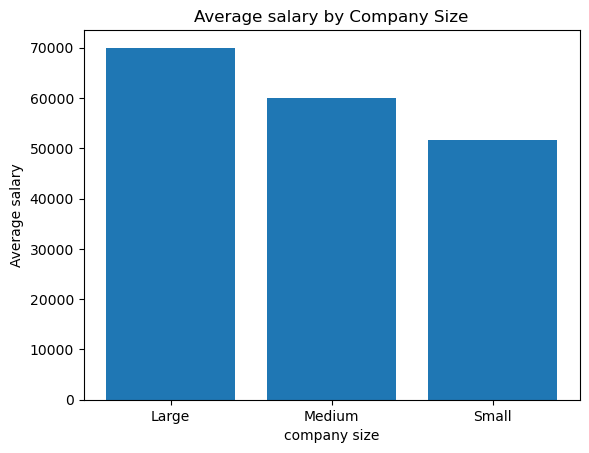

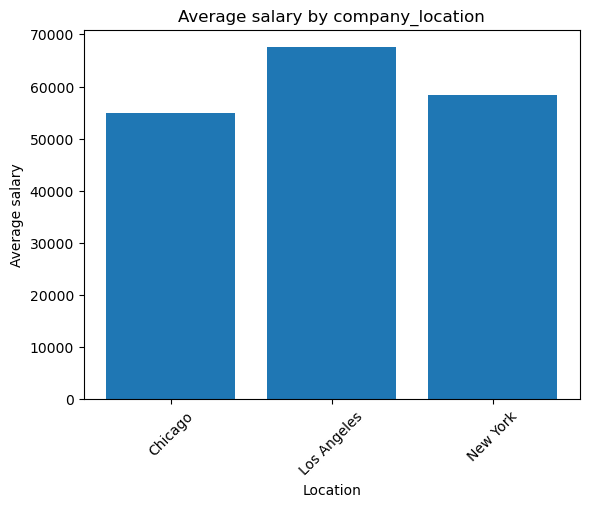

In [31]:
# determine how  salaries differ based on company size or location 


data = {
    'salary': [50000, 60000, 70000, 55000, 65000, 75000, 45000, 55000],
    'company_size': ['Small', 'Small', 'Medium', 'Medium', 'Large', 'Large', 'Small', 'Medium'],
    'company_location': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Chicago', 'Los Angeles', 'Chicago', 'New York']
}

# Create DataFrame
df = pd.DataFrame(data)

# Analyze salaries based on company size
avg_salary_by_size = df.groupby('company_size')['salary'].mean()

# Visualize average salaries based on company size
plt.bar(avg_salary_by_size.index, avg_salary_by_size.values)
plt.xlabel('company size')
plt.ylabel('Average salary')
plt.title('Average salary by Company Size')
plt.show()

# Analyze salaries based on location
avg_salary_by_location = df.groupby('company_location')['salary'].mean()

# Visualize average salaries based on location
plt.bar(avg_salary_by_location.index, avg_salary_by_location.values)
plt.xlabel('Location')
plt.ylabel('Average salary')
plt.title('Average salary by company_location')
plt.xticks(rotation=45)
plt.show()


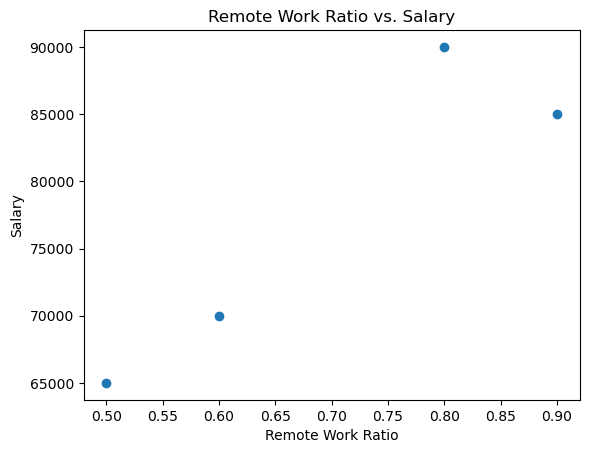

Slope: 59999.99999999999
Intercept: 35500.0
R-squared: 0.8470588235294118
P-value: 0.07964201338315545


In [32]:
# How does the ratio of remote work affect salary levels
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Example data (replace with your actual data)
data = {
    'Position': ['AI Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist'],
    'Salary': [90000, 65000, 85000, 70000],
    'Remote_Work_Ratio': [0.8, 0.5, 0.9, 0.6]  # Ratio of remote work (0 to 1)
}

# Create DataFrame
df = pd.DataFrame(data)

# Scatter plot of remote work ratio vs. salary
plt.scatter(df['Remote_Work_Ratio'], df['Salary'])
plt.xlabel('Remote Work Ratio')
plt.ylabel('Salary')
plt.title('Remote Work Ratio vs. Salary')
plt.show()

# Perform linear regression analysis
slope, intercept, r_value, p_value, std_err = linregress(df['Remote_Work_Ratio'], df['Salary'])

# Print regression results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
